# **Ejercicio 1**
Contenido del dataset: Candidatos a púlsar obtenidos mediante la exploración HTRU. Los púlsares son un tipo de estrella, de considerable interés científico. Los candidatos deben estar clasificados en clases pulsar y no pulsar para facilitar el descubrimiento.
El ejercicio consiste obtener un modelo de clasificación para clasificar en pulsar (clase positiva) y no pulsar (clase negativa).
El dataset está en formato csv, contiene 8 atributos y la clase. No aparecen los nombres de los atributos en la primera línea del dataset. En el código suministrado se resuelve este problema.

*   URL: https://archive.ics.uci.edu/ml/datasets/HTRU2
*   URL Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip

**Tomando como base el ejemplo1 de los suministrados en clase**, implementar un clasificador basado en el descenso de gradiente estocástico (SGDClassifier), que contenga los siguientes apartados:
*   Uso de StandardScaler en el preprocesamiento.
*   Uso de train_test_split para obtener conjunto de entrenamiento y test. Usar opción stratify ya que las clases están desbalanceadas,
*   Uso de make_pipeline para crear un "pipe", que contenga el preprocesamiento y el clasificador.
*   Obtener matriz de confusión en texto y gráfica. Así como el accuracy, precisión, recall y f1.
*   Obtener curva ROC y su área.
*   Obtener curva presición recall.
*   Escribir al final una celda de texto resumiendo los pasos que se han dado y los resultados obtenidos.
Utilizando el mismo dataset implementar clasificadores basados en Regresión Logística, SVM lineal y K vecinos más cercanos. Realizando 

Toda la parte del descarga y preparación del dataset se suministra en este archivo.

In [2]:
import pandas as pd

In [3]:
#https://archive.ics.uci.edu/ml/datasets/HTRU2   este es bueno para usar en la práctica  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/

In [4]:
%%bash
wget https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
unzip HTRU2.zip

Archive:  HTRU2.zip
  inflating: HTRU_2.csv              
  inflating: HTRU_2.arff             
  inflating: Readme.txt              


--2022-12-24 10:54:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/00372/HTRU2.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1563015 (1.5M) [application/x-httpd-php]
Saving to: ‘HTRU2.zip’

     0K .......... .......... .......... .......... ..........  3%  515K 3s
    50K .......... .......... .......... .......... ..........  6% 1.01M 2s
   100K .......... .......... .......... .......... ..........  9% 61.1M 1s
   150K .......... .......... .......... .......... .......... 13% 1.05M 1s
   200K .......... .......... .......... .......... .......... 16% 41.7M 1s
   250K .......... .......... .......... .......... .......... 19% 49.0M 1s
   300K .......... .......... .......... .......... .......... 22% 56.8M 1s
   350K .......... .......... .......... .......... .......... 26% 1.09M 1s
   400K .....

In [5]:
htru2 = pd.read_csv("/content/HTRU_2.csv", header = 0, names = ["MEAN_IP", "SD_IP", "EK_IP", "S_IP", "MEAN_DN-SNR", "SD_DM-SNR", "EK_DM-SNR", "S_DM-SNR", "label"]) 
#Para añadir nombres a los atributos cuando no aparecen en el archivo csv

In [6]:
htru2.head()

,MEAN_IP,SD_IP,EK_IP,S_IP,MEAN_DN-SNR,SD_DM-SNR,EK_DM-SNR,S_DM-SNR,label
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,0


In [7]:
htru2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MEAN_IP      17897 non-null  float64
 1   SD_IP        17897 non-null  float64
 2   EK_IP        17897 non-null  float64
 3   S_IP         17897 non-null  float64
 4   MEAN_DN-SNR  17897 non-null  float64
 5   SD_DM-SNR    17897 non-null  float64
 6   EK_DM-SNR    17897 non-null  float64
 7   S_DM-SNR     17897 non-null  float64
 8   label        17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [8]:
htru2_labels = htru2["label"] #Guardamos etiquetas aparte

In [9]:
htru2_data = htru2.drop("label", axis = 1) #Eliminamos la etiqueta

In [10]:
htru2_labels = (htru2_labels == 1) #Cambiamos la etiqueta/clase de 0/1 a True/False

In [11]:
htru2_labels.head()

0    False
1    False
2    False
3    False
4    False
Name: label, dtype: bool

In [12]:
htru2_labels.value_counts() #Como se puede ver, las clases están desbalanceadas y habrá que tenerlo en cuenta

False    16258
True      1639
Name: label, dtype: int64

In [13]:
import sklearn
assert sklearn.__version__ >= "0.20"

In [14]:
from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.pipeline import make_pipeline #Para usar el pipe
from sklearn.linear_model import SGDClassifier #Para usar el clasificador SGD
from sklearn.model_selection import train_test_split #Para particionar conjuntos de entrenamiento y test.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(htru2_data, htru2_labels, stratify=htru2_labels)
#El último parámetro es para estratificar en función del objetivo y que los conjuntos estén balanceados.

In [16]:
import collections
collections.Counter(y_test) #Para ver la frecuencia como se distribuye el y_test

Counter({False: 4065, True: 410})

In [17]:
sgd_clasificador = make_pipeline(StandardScaler(), SGDClassifier(random_state = 42))

In [18]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
sgd_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [19]:
y_train[:20], sgd_clasificador.predict(X_train[:20])

(17605    False
 9006     False
 14311    False
 9036      True
 2087     False
 6172     False
 17415    False
 14017    False
 10926    False
 7420     False
 5117     False
 3657     False
 10331    False
 2224     False
 3730     False
 11419     True
 5660      True
 5482     False
 14818    False
 7491     False
 Name: label, dtype: bool,
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False]))

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = sgd_clasificador.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


In [21]:
cm

array([[4044,   21],
       [  76,  334]])

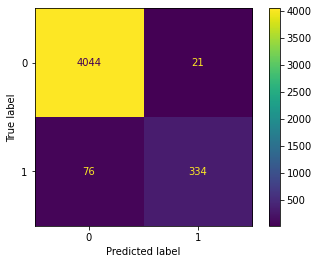

In [22]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [23]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9783240223463687,
 0.9408450704225352,
 0.8146341463414634,
 0.8732026143790849)

In [24]:
#Ahora vamos a ver la curva ROC
from sklearn.metrics import roc_curve, roc_auc_score #para obtener la curva roc y su área
from sklearn.metrics import RocCurveDisplay

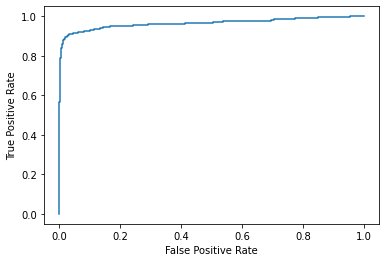

In [25]:
y_score = sgd_clasificador.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [26]:
roc_auc_score(y_test, y_score) #area bajo la curva roc

0.9646284462844629

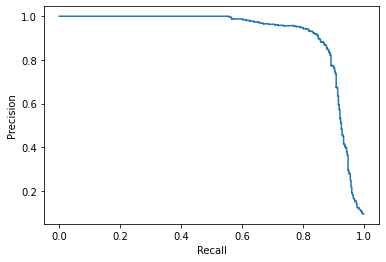

In [27]:
#Ahora vamos a crear la curva precision recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


# **Regresión Logística**

In [28]:
from sklearn.linear_model import LogisticRegression #Para usar el clasificador RegresionLogistica

sgd_clasificador = make_pipeline(StandardScaler(), LogisticRegression(random_state = 42))

In [29]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
sgd_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [30]:
y_train[:20], sgd_clasificador.predict(X_train[:20])

(17605    False
 9006     False
 14311    False
 9036      True
 2087     False
 6172     False
 17415    False
 14017    False
 10926    False
 7420     False
 5117     False
 3657     False
 10331    False
 2224     False
 3730     False
 11419     True
 5660      True
 5482     False
 14818    False
 7491     False
 Name: label, dtype: bool,
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False]))

In [31]:
y_pred = sgd_clasificador.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


In [32]:
cm

array([[4045,   20],
       [  86,  324]])

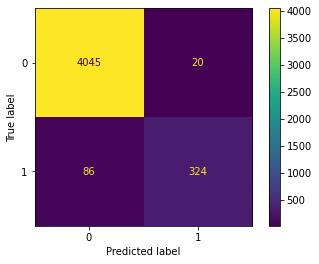

In [33]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [34]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9763128491620112,
 0.9418604651162791,
 0.7902439024390244,
 0.8594164456233422)

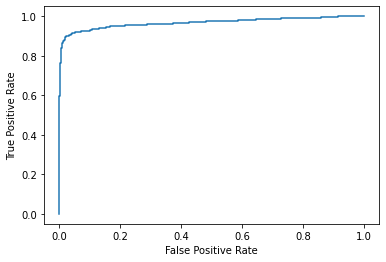

In [35]:
y_score = sgd_clasificador.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [36]:
roc_auc_score(y_test, y_score) #area bajo la curva roc

0.9673578735787358

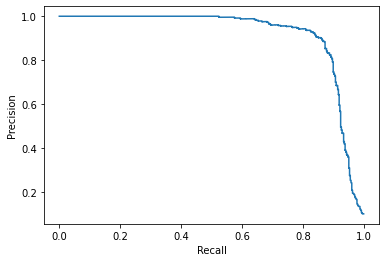

In [37]:
#Ahora vamos a crear la curva precision recall
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


# **SVM Lineal**

In [38]:
from sklearn.svm import LinearSVC #Para usar el clasificador RegresionLogistica

sgd_clasificador = make_pipeline(StandardScaler(), LinearSVC(random_state = 42))

In [39]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
sgd_clasificador.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=42))])

In [40]:
y_train[:20], sgd_clasificador.predict(X_train[:20])

(17605    False
 9006     False
 14311    False
 9036      True
 2087     False
 6172     False
 17415    False
 14017    False
 10926    False
 7420     False
 5117     False
 3657     False
 10331    False
 2224     False
 3730     False
 11419     True
 5660      True
 5482     False
 14818    False
 7491     False
 Name: label, dtype: bool,
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False]))

In [41]:
y_pred = sgd_clasificador.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


In [42]:
cm

array([[4048,   17],
       [  89,  321]])

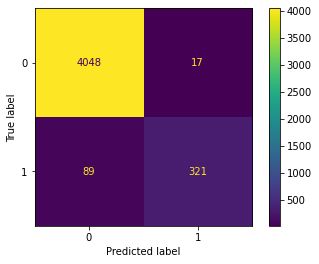

In [43]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [44]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9763128491620112, 0.9497041420118343, 0.7829268292682927, 0.858288770053476)

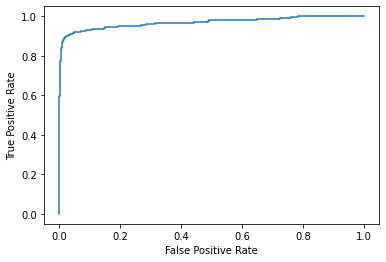

In [45]:
y_score = sgd_clasificador.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [46]:
roc_auc_score(y_test, y_score) #area bajo la curva roc

0.9681822818228183

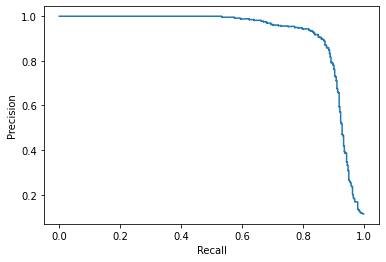

In [47]:
#Ahora vamos a crear la curva precision recall
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


# **K vecinos** 

In [59]:
from sklearn.neighbors import KNeighborsClassifier #Para usar el clasificador RegresionLogistica

sgd_clasificador = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [60]:
#Aplicamos el clasificador al conjunto de entrenamiento mediante la función fit
sgd_clasificador.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [61]:
y_train[:20], sgd_clasificador.predict(X_train[:20])

(17605    False
 9006     False
 14311    False
 9036      True
 2087     False
 6172     False
 17415    False
 14017    False
 10926    False
 7420     False
 5117     False
 3657     False
 10331    False
 2224     False
 3730     False
 11419     True
 5660      True
 5482     False
 14818    False
 7491     False
 Name: label, dtype: bool,
 array([False, False, False,  True, False, False, False, False, False,
        False, False, False, False, False, False,  True,  True, False,
        False, False]))

In [62]:
y_pred = sgd_clasificador.predict(X_test)
cm = confusion_matrix(y_test, y_pred)


In [63]:
cm

array([[4042,   23],
       [  80,  330]])

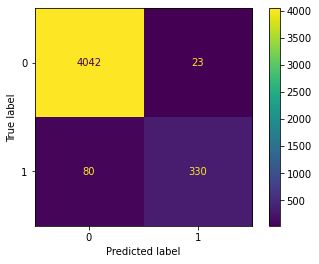

In [64]:
cm_display = ConfusionMatrixDisplay(cm).plot()

In [65]:
#Ahora vamos a calcular accuracy, precision, recall y F1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

(0.9769832402234637,
 0.9348441926345609,
 0.8048780487804879,
 0.8650065530799476)

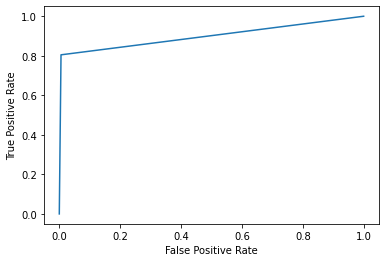

In [72]:
y_score = sgd_clasificador.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [68]:
roc_auc_score(y_test, y_score) #area bajo la curva roc

0.899609996099961

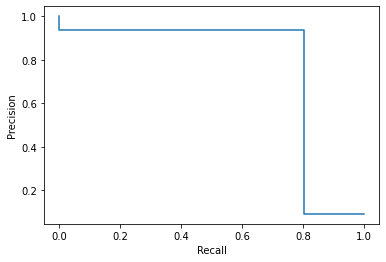

In [69]:
#Ahora vamos a crear la curva precision recall
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=sgd_clasificador.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()


# **Resultados** 

\begin{array}{|c|c|} \hline
 & accuracy\_score & precision\_score & recall\_score & f1\_score \\ \hline
SGDClassifier & 0.9783 & 0.9408 & 0.8146 & 0.8732 \\ \hline
Regresión Logística & 0.9763 &  0.9418 & 0.7902 & 0.8594 \\ \hline
SVM lineal & 0.9763 & 0.9497 & 0.7829 & 0.8582 \\ \hline
K vecinos & 0.9769 & 0.9348 & 0.8048 & 0.8650 \\ \hline
\end{array}

Para la realización de este ejercicio, se ha seguido como ejemplo la práctica 1. Una vez realizado el apartado de SGDClassifier, se replicó para el resto de clasificadores (sin modificar sus parámetros de entrada).

Los resultados obtenidos se pueden apreciar en la tabla anterior, como se puede observar, los resultados son muy similares de tal forma que para este dataset, se podría utilizar cualquiera de los clasificadores utilizados.